# FoldAR
##### Ian Brown, Tani Cath, Tom Cavey
##### Colorado State University
##### CS567 3D User Interfaces

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv('sessionData-107-0.csv')

# stripping spaces from columns an data...
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# check columns are stripped
print(df.columns)

all_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']


finger_columns = ['thumbTip', 'thumbIP', 'thumbMP', 'thumbCMC', 'thumbTip2', 'thumbIP2', 'thumbMP2', 'thumbCMC2',
                  'indexTip', 'indexPIP', 'indexDIP', 'indexMCP', 'indexTip2', 'indexPIP2', 'indexDIP2', 'indexMCP2',
                  'middleTip', 'middlePIP', 'middleDIP', 'middleMCP', 'middleTip2', 'middlePIP2', 'middleDIP2', 'middleMCP2',
                  'ringTip', 'ringPIP', 'ringDIP', 'ringMCP', 'ringTip2', 'ringPIP2', 'ringDIP2', 'ringMCP2',
                  'littleTip', 'littlePIP', 'littleDIP', 'littleMCP', 'littleTip2', 'littlePIP2', 'littleDIP2', 'littleMCP2']

fingertip_columns = [
    'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
    'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
    'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
    'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
    'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
]
frame_means  = []
tip_means    = []
finger_means = []

# for each frame in dataframe
for i, frame in df.groupby('frame'):
    timestamp_datetime = datetime.strptime(frame['time'].iloc[0], '%H:%M:%S.%f')

    # Euclidean distances
    # all points
    distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

    #tips
    tipDistances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

    # individual fingers
    #fingerDistances =

    # calc statistics for each frame
    frame_mean = np.mean(distances)
    tip_mean = np.mean(tipDistances)
    frame_means.append(frame_mean)
    tip_means.append(tip_mean)
    # frame_min = np.min(distances[distances > 0])
    # frame_max = np.max(distances)
    # frame_std = np.std(distances)


    # CURRENT PLOTS
    # plt.figure(i)
    # plt.title(f'Frame {i}')
    # for j, finger in enumerate(finger_columns):
    #     color = plt.cm.magma(j / len(finger_columns))
    #     plt.plot(frame[f"{finger}.x"], frame[f"{finger}.y"], 'o', label=finger, color=color)
    # plt.show()

    # for fingertip in fingertip_columns:
    #     color = plt.cm.magma(len(fingertip_columns) - fingertip_columns.index(fingertip) - 1)
    #     plt.plot(frame[f'{fingertip}'], frame[f'{fingertip}'], 'o', label=fingertip, color=color)
    # plt.show()

    window_size = 5
    all_moving_average = np.convolve(frame_means, np.ones(window_size)/window_size, mode='valid')
    tips_moving_average = np.convolve(tip_means, np.ones(window_size)/window_size, mode='valid')


    print(f'Frame {i}:')
    print(f'Timestamp: {timestamp_datetime}')
    print(f'Mean Distance: {frame_mean:.2f}')
    # print(f'Minimum Distance: {frame_min:.2f}')
    # print(f'Maximum Distance: {frame_max:.2f}')
    # print(f'Standard Deviation: {frame_std:.2f}')
    print()


Index(['pid', 'mode', 'frame', 'date', 'time', 'thumbTip.x', 'thumbTip.y',
       'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x',
       'thumbCMC.y', 'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y',
       'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y', 'indexTip.x',
       'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y',
       'indexMCP.x', 'indexMCP.y', 'indexTip2.x', 'indexTip2.y', 'indexPIP2.x',
       'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x',
       'indexMCP2.y', 'middleTip.x', 'middleTip.y', 'middlePIP.x',
       'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x',
       'middleMCP.y', 'middleTip2.x', 'middleTip2.y', 'middlePIP2.x',
       'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x',
       'middleMCP2.y', 'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y',
       'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y', 'ringTip2.x',
       'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y'

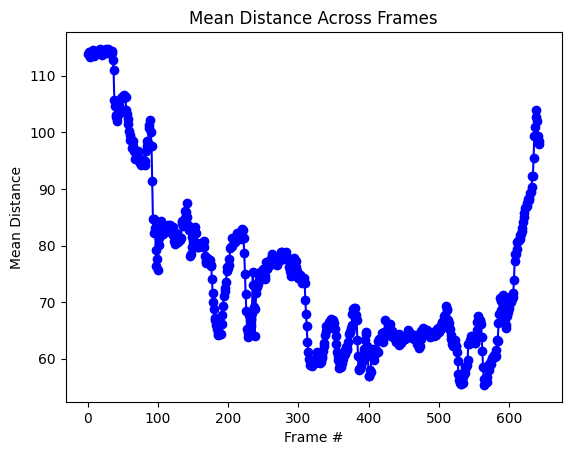

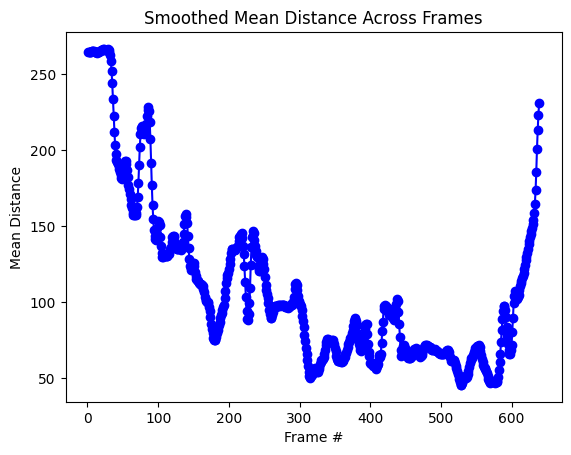

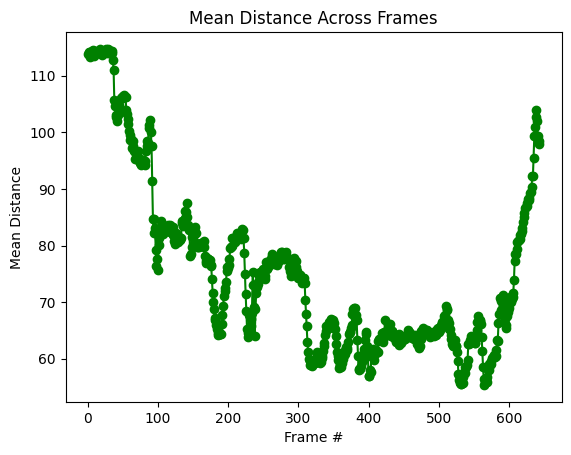

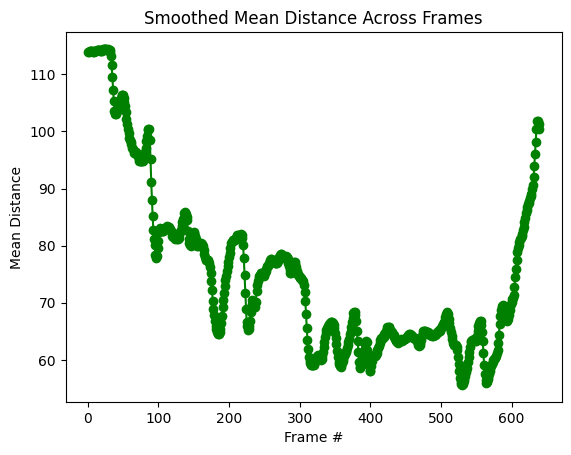

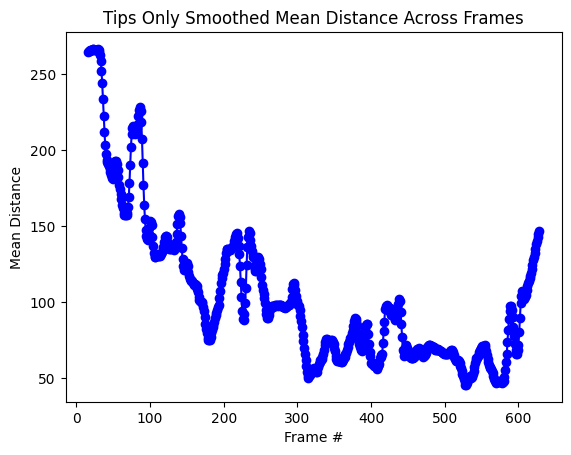

In [5]:
plt.plot(range(1, len(tip_means) + 1), frame_means, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(tip_means) + 1)[:len(tips_moving_average)], tips_moving_average, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Smoothed Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(frame_means) + 1), frame_means, marker='o', linestyle='-', color='g')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(frame_means) + 1)[:len(all_moving_average)], all_moving_average, marker='o', linestyle='-', color='g')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Smoothed Mean Distance Across Frames')
plt.show()

start_frame, end_frame = 15, 15
trimmed_tip_means = tip_means[start_frame:-end_frame]
trimmed_tips_moving_average = tips_moving_average[start_frame:end_frame + len(trimmed_tip_means)]

plt.plot(range(start_frame + 1, start_frame + 1 + len(trimmed_tip_means)), trimmed_tips_moving_average, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Tips Only Smoothed Mean Distance Across Frames')
plt.show()

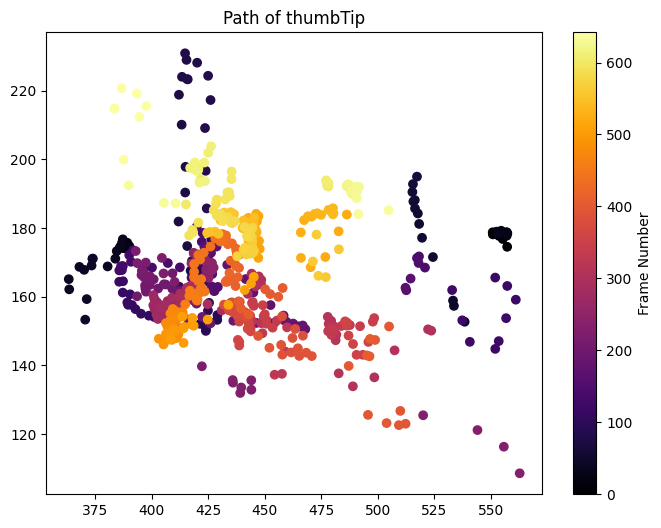

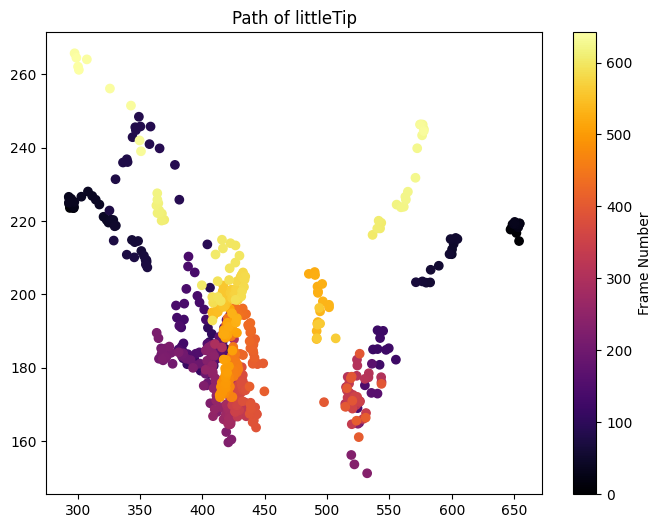

In [6]:
point_to_plot = 'thumbTip'
x_coords = df[f'{point_to_plot}.x']
y_coords = df[f'{point_to_plot}.y']

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

plt.title(f'Path of {point_to_plot}')
plt.colorbar(label='Frame Number')
# plt.grid(True)
plt.show()


point_to_plot = 'littleTip'
x_coords = df[f'{point_to_plot}.x']
y_coords = df[f'{point_to_plot}.y']

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

plt.title(f'Path of {point_to_plot}')
plt.colorbar(label='Frame Number')
# plt.grid(True)
plt.show()

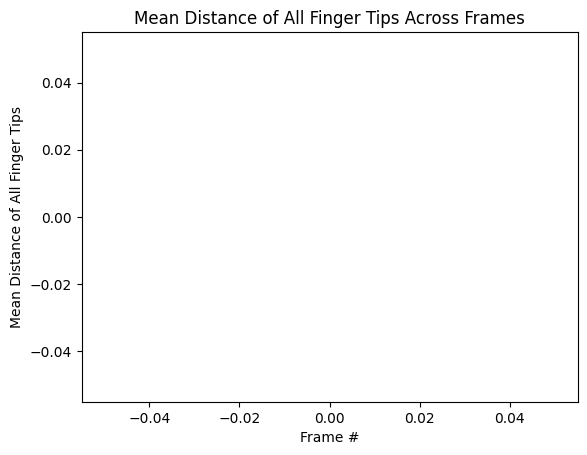

In [7]:
just_the_tips = [
    'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
    'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
    'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
    'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
    'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
]

# mean distance for only finger tips
df['allTips.mean_distance'] = np.sqrt(df[just_the_tips].diff(axis=1, periods=2)[::2]**2 +
                                      df[just_the_tips].diff(axis=1, periods=2)[1::2]**2).mean(axis=1)

plt.plot(df['frame'], df['allTips.mean_distance'], marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance of All Finger Tips')
plt.title('Mean Distance of All Finger Tips Across Frames')
plt.show()